Start

# Below is a quick code that uses neural network for building handwritten digit recognization model.

In [2]:
# Importing all the required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.math import confusion_matrix
from tensorflow.keras.datasets import mnist

In [4]:
# Loading the MNIST data set
(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [ ]:
# scaling the values
X_train = X_train/255
X_test = X_test/255

In [ ]:
# Configuring and Compiling the layers of the NN
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Fitting (Training) the NN
model.fit(X_train, Y_train, epochs=6)

Epoch 1/6
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3051 - accuracy: 0.9130
Epoch 2/6
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1440 - accuracy: 0.9567
Epoch 3/6
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1081 - accuracy: 0.9669
Epoch 4/6
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0840 - accuracy: 0.9740
Epoch 5/6
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0715 - accuracy: 0.9777
Epoch 6/6
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0597 - accuracy: 0.9815


In [ ]:
# Evaluating the trained model
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1042 - accuracy: 0.9684
0.9684000015258789


In [ ]:
# Using the trained model to generate predictions for test data set
Y_pred = model.predict(X_test)
Y_pred_labels = [np.argmax(i) for i in Y_pred] # probabilities to label

313/313 [==============================] - 1s 2ms/step


Text(0.5, 47.7222222222222, 'Predicted Labels')

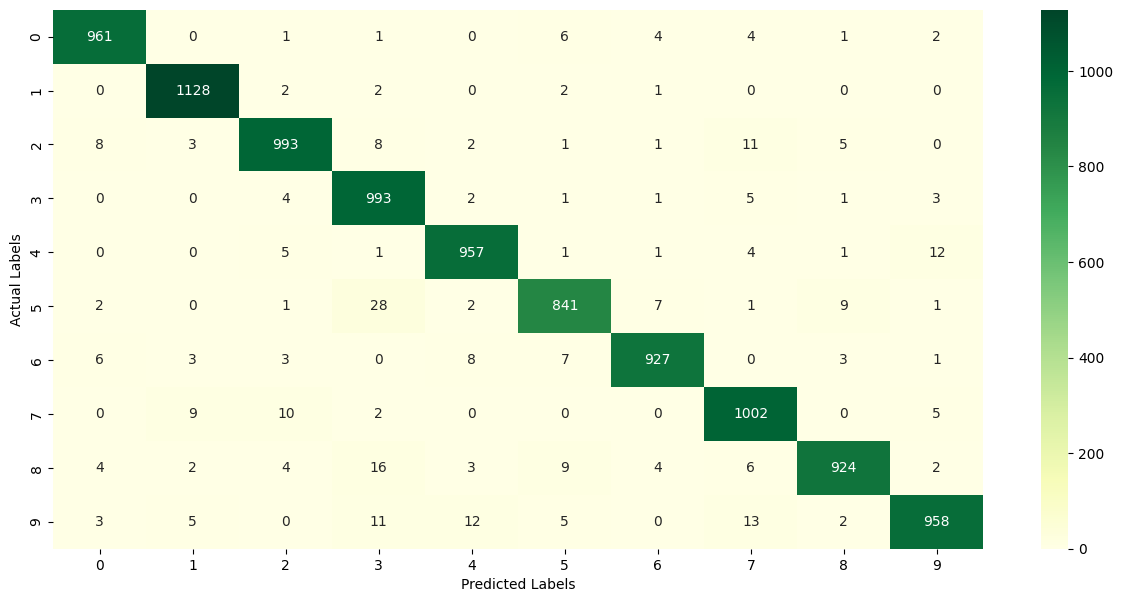

In [ ]:
# Generating and Plotting Confusion Matrix
conf_mat = confusion_matrix(Y_test, Y_pred_labels)
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='YlGn')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')

End